# Setting seeds for reproducability

In [1]:
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import cv2
from tqdm import tqdm

import datetime
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Stack VGG

In [2]:
imgen = ImageDataGenerator(rescale=1/255)
train_generator = imgen.flow_from_directory('../input/train',batch_size=32, target_size=(150,150))

Found 4606 images belonging to 12 classes.


In [3]:
validation_generator = imgen.flow_from_directory('../input/validation',
                                                 batch_size=32, 
                                                 target_size=(150,150))

Found 144 images belonging to 12 classes.


In [4]:
from keras.applications.vgg16 import VGG16

In [5]:
vgg_model = VGG16(include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 3s 0us/step


In [6]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [7]:
for layer in vgg_model.layers:
  layer.trainable = False

In [8]:
finetune = Sequential(layers = vgg_model.layers)

In [9]:
finetune.add(Flatten())
finetune.add(Dense(12))
finetune.add(Activation('softmax'))

In [10]:
finetune.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       295168    
__________

In [11]:
finetune.compile(loss='categorical_crossentropy',
                 optimizer='adam', 
                 metrics = ['acc'])

In [12]:
finetune.fit_generator(train_generator,
                    epochs=8,
                    steps_per_epoch= 4606 // 32, 
                    validation_data=validation_generator, 
                    validation_steps= 144//32)

Epoch 1/8
143/143 [==============================] - 76s 530ms/step - loss: 1.6511 - acc: 0.4618 - val_loss: 1.3965 - val_acc: 0.5312
Epoch 2/8
143/143 [==============================] - 52s 361ms/step - loss: 1.0320 - acc: 0.6904 - val_loss: 1.3068 - val_acc: 0.5804
Epoch 3/8
143/143 [==============================] - 52s 361ms/step - loss: 0.8179 - acc: 0.7608 - val_loss: 1.0807 - val_acc: 0.5804
Epoch 4/8
143/143 [==============================] - 51s 356ms/step - loss: 0.6835 - acc: 0.8090 - val_loss: 0.9637 - val_acc: 0.6875
Epoch 5/8
143/143 [==============================] - 52s 364ms/step - loss: 0.5976 - acc: 0.8356 - val_loss: 0.8847 - val_acc: 0.7321
Epoch 6/8
143/143 [==============================] - 51s 357ms/step - loss: 0.5228 - acc: 0.8585 - val_loss: 1.0476 - val_acc: 0.6328
Epoch 7/8
143/143 [==============================] - 52s 364ms/step - loss: 0.4702 - acc: 0.8819 - val_loss: 0.8713 - val_acc: 0.7143
Epoch 8/8
143/143 [==============================] - 51s 358ms

In [13]:
!wget https://storage.googleapis.com/aibootcamp/data/plants.zip


--2023-01-15 22:09:14--  https://storage.googleapis.com/aibootcamp/data/plants.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 173.194.215.128, 173.194.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1808677454 (1.7G) [application/zip]
Saving to: ‘plants.zip’

plants.zip          100%[=====================>]   1.68G  25.8MB/s   in 73s    

2023-01-15 22:10:28 (23.6 MB/s) - ‘plants.zip’ saved [1808677454/1808677454]



In [14]:
!unzip plants.zip


Archive:  plants.zip
   creating: plants/
 extracting: plants/sample_submission.csv.zip  
 extracting: plants/train.zip        
 extracting: plants/test.zip         


In [15]:
!unzip plants/train.zip

Archive:  plants/train.zip
   creating: train/
   creating: train/Fat Hen/
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9d4722e74.png  
  inflating: train/Fat Hen/4e2f543a2.png  
  inflating: train/Fat

In [16]:
train_datagen = ImageDataGenerator(
 rescale = 1/255,
 rotation_range=90,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.1,
 horizontal_flip=True,
 fill_mode='nearest')

In [17]:
from keras.preprocessing import image
fname = 'train/Charlock/270209308.png'

In [18]:
img = image.load_img(fname, target_size=(150,150))
img = image.img_to_array(img)

In [19]:
img = np.expand_dims(img,axis=0)

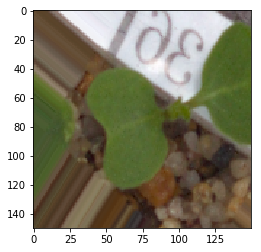

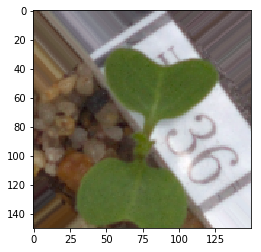

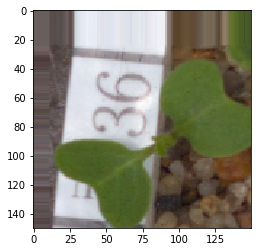

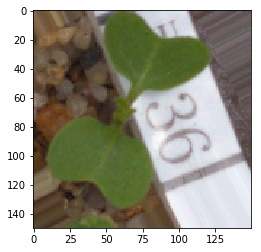

In [20]:
import matplotlib.pyplot as plt

gen = train_datagen.flow(img, batch_size=1)


for i in range(4):
    plt.figure(i)
    batch = next(gen)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    
plt.show()